Objective is to use census and epa keys to combine population data. The census will provide the population
and the EPA will provide the air quality data.
I would like to break the population (total population, population density) down by counties.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from census import Census
from us import states
from config import epakey, censuskey

c = Census(censuskey)

In [2]:
# Run Census Search to retrieve data on all counties in all states
# The c.acs5.get is from the census wrapping in a github repo
census_data_1 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2016)

# Convert to DataFrame
census_2016 = pd.DataFrame(census_data_1)

# Column Reordering
census_2016 = census_2016.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_1 = census_2016[census_2016["Name"].str.contains("Minnesota")]
census_mn_2016 = pd.concat([census_mn_1, census_mn_1["Name"].str.split(',', expand=True)], axis=1)
census_mn_2016 = census_mn_2016.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2016["County"] = census_mn_2016["County"].str.replace("County", '')
census_mn_2016["County"] = census_mn_2016["County"].str.strip()
del census_mn_2016["Name"]

census_mn_2016.head()


,Population,state,County Code,County,State Name
1376,15722.0,27,001,Aitkin,Minnesota
1377,341249.0,27,003,Anoka,Minnesota
1378,33375.0,27,005,Becker,Minnesota
1379,45644.0,27,007,Beltrami,Minnesota
1380,39457.0,27,009,Benton,Minnesota


In [3]:
census_data_2 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2017)

# Convert to DataFrame
census_2017 = pd.DataFrame(census_data_2)

# Column Reordering
census_2017 = census_2017.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_2 = census_2017[census_2017["Name"].str.contains("Minnesota")]
census_mn_2017 = pd.concat([census_mn_2, census_mn_2["Name"].str.split(',', expand=True)], axis=1)
census_mn_2017 = census_mn_2017.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2017["County"] = census_mn_2017["County"].str.replace("County", '')
census_mn_2017["County"] = census_mn_2017["County"].str.strip()
del census_mn_2017["Name"]

census_mn_2017.head()


,Population,state,County Code,County,State Name
1391,6398.0,27,167,Wilkin,Minnesota
1392,4017.0,27,125,Red Lake,Minnesota
1393,15841.0,27,001,Aitkin,Minnesota
1394,62040.0,27,027,Clay,Minnesota
1395,13966.0,27,043,Faribault,Minnesota


In [4]:
census_data_3 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2018)

# Convert to DataFrame
census_2018 = pd.DataFrame(census_data_3)

# Column Reordering
census_2018 = census_2018.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_3 = census_2018[census_2018["Name"].str.contains("Minnesota")]
census_mn_2018 = pd.concat([census_mn_3, census_mn_3["Name"].str.split(',', expand=True)], axis=1)
census_mn_2018 = census_mn_2018.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2018["County"] = census_mn_2018["County"].str.replace("County", '')
census_mn_2018["County"] = census_mn_2018["County"].str.strip()
del census_mn_2018["Name"]

census_mn_2018.head()


,Population,state,County Code,County,State Name
504,11372.0,27,033,Cottonwood,Minnesota
505,143372.0,27,139,Scott,Minnesota
506,20582.0,27,039,Dodge,Minnesota
507,21500.0,27,157,Wabasha,Minnesota
508,9185.0,27,117,Pipestone,Minnesota


In [5]:
#read in EPA csv files
epa_aqi_2016 = pd.read_csv("AQI_2016.csv")
epa_aqi_2017 = pd.read_csv("AQI_2017.csv")
epa_aqi_2018 = pd.read_csv("AQI_2018.csv")

epa_aqi_mn_2016 = epa_aqi_2016[epa_aqi_2016["State"].str.contains("Minnesota")]
epa_aqi_mn_2017 = epa_aqi_2017[epa_aqi_2017["State"].str.contains("Minnesota")]
epa_aqi_mn_2018 = epa_aqi_2018[epa_aqi_2018["State"].str.contains("Minnesota")]

epa_aqi_mn_2018.head(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
455,Minnesota,Anoka,2018,365,278,86,1,0,0,0,115,63,40,0,6,216,0,142,1
456,Minnesota,Becker,2018,358,322,36,0,0,0,0,100,51,31,0,0,203,0,155,0
457,Minnesota,Beltrami,2018,352,327,24,1,0,0,0,106,41,23,0,0,0,0,352,0
458,Minnesota,Carlton,2018,354,330,24,0,0,0,0,93,45,26,0,0,159,0,195,0
459,Minnesota,Cass,2018,320,292,28,0,0,0,0,100,47,23,0,0,0,0,320,0
460,Minnesota,Cook,2018,353,341,12,0,0,0,0,65,31,18,0,0,0,0,353,0
461,Minnesota,Crow Wing,2018,348,311,36,1,0,0,0,107,52,27,0,0,167,0,181,0
462,Minnesota,Dakota,2018,365,310,55,0,0,0,0,91,54,31,0,64,0,0,301,0
463,Minnesota,Goodhue,2018,231,206,24,1,0,0,0,133,51,38,0,0,231,0,0,0
464,Minnesota,Hennepin,2018,365,228,136,1,0,0,0,104,64,44,4,12,60,0,159,130


In [6]:
census_mn_2016["County"] = census_mn_2016["County"].astype(str)
epa_aqi_mn_2016["County"] = epa_aqi_mn_2016["County"].astype(str)

df1 = epa_aqi_mn_2016.merge(census_mn_2016, on = "County")

df1.head()

C:\Users\BrandonSU\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name
0,Minnesota,Anoka,2016,366,328,37,1,0,0,0,...,0,13,251,0,102,0,341249.0,27,003,Minnesota
1,Minnesota,Becker,2016,361,337,24,0,0,0,0,...,0,0,197,0,164,0,33375.0,27,005,Minnesota
2,Minnesota,Beltrami,2016,358,344,14,0,0,0,0,...,0,0,0,0,358,0,45644.0,27,007,Minnesota
3,Minnesota,Carlton,2016,364,345,18,1,0,0,0,...,0,0,256,0,108,0,35482.0,27,017,Minnesota
4,Minnesota,Cook,2016,356,354,2,0,0,0,0,...,0,0,0,0,356,0,5215.0,27,031,Minnesota


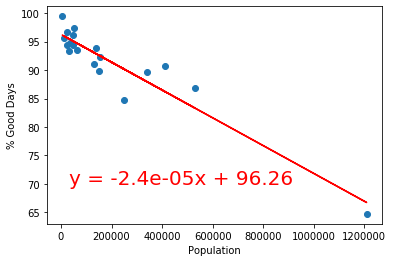

R squared: 0.8899286921942064


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name,Air Quality
0,Minnesota,Anoka,2016,366,328,37,1,0,0,0,...,13,251,0,102,0,341249.0,27,003,Minnesota,89.617486
1,Minnesota,Becker,2016,361,337,24,0,0,0,0,...,0,197,0,164,0,33375.0,27,005,Minnesota,93.351801
2,Minnesota,Beltrami,2016,358,344,14,0,0,0,0,...,0,0,0,358,0,45644.0,27,007,Minnesota,96.089385
3,Minnesota,Carlton,2016,364,345,18,1,0,0,0,...,0,256,0,108,0,35482.0,27,017,Minnesota,94.780220
4,Minnesota,Cook,2016,356,354,2,0,0,0,0,...,0,0,0,356,0,5215.0,27,031,Minnesota,99.438202
5,Minnesota,Crow Wing,2016,357,334,23,0,0,0,0,...,0,161,0,196,0,63321.0,27,035,Minnesota,93.557423
6,Minnesota,Dakota,2016,366,332,32,2,0,0,0,...,90,0,5,271,0,411402.0,27,037,Minnesota,90.710383
7,Minnesota,Goodhue,2016,214,202,12,0,0,0,0,...,0,214,0,0,0,46450.0,27,049,Minnesota,94.392523
8,Minnesota,Hennepin,2016,366,237,127,2,0,0,0,...,21,51,0,123,171,1209265.0,27,053,Minnesota,64.754098
9,Minnesota,Lake,2016,366,350,16,0,0,0,0,...,0,171,0,133,62,10721.0,27,075,Minnesota,95.628415


In [7]:
population_2016 = df1.iloc[:, 19]
air_2016 = df1.iloc[:, 4]
aqi_days_2016 = df1.iloc[:, 3]
df1["Air Quality"] = (air_2016 / aqi_days_2016)*100

air_quality_2016 = df1.iloc[:, 23]
six_slope, six_int, six_r, six_p, six_std_err = stats.linregress(population_2016, air_quality_2016)
six_fit = six_slope * population_2016 + six_int
line_1 = "y = " + str(round(six_slope, 6)) + "x + " + str(round(six_int, 2))
plt.scatter(population_2016, air_quality_2016)
plt.plot(population_2016, six_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_1, (33375, 70), fontsize=20, color = "red")
plt.show()
print(f"R squared: {six_r ** 2}")
df1.head(25)

In [8]:
census_mn_2017["County"] = census_mn_2017["County"].astype(str)
epa_aqi_mn_2017["County"] = epa_aqi_mn_2017["County"].astype(str)

df2 = epa_aqi_mn_2017.merge(census_mn_2017, on = "County")

df2.head()

C:\Users\BrandonSU\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name
0,Minnesota,Anoka,2017,365,291,74,0,0,0,0,...,0,6,207,0,151,1,344861.0,27,003,Minnesota
1,Minnesota,Becker,2017,364,341,23,0,0,0,0,...,0,0,202,0,162,0,33552.0,27,005,Minnesota
2,Minnesota,Beltrami,2017,353,331,22,0,0,0,0,...,0,0,0,0,353,0,45847.0,27,007,Minnesota
3,Minnesota,Carlton,2017,365,346,19,0,0,0,0,...,0,0,193,0,172,0,35408.0,27,017,Minnesota
4,Minnesota,Cook,2017,351,344,7,0,0,0,0,...,0,0,0,0,351,0,5270.0,27,031,Minnesota


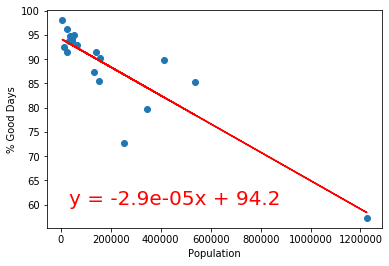

R squared: 0.7654630317655639


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name,Air Quality
0,Minnesota,Anoka,2017,365,291,74,0,0,0,0,...,6,207,0,151,1,344861.0,27,003,Minnesota,79.726027
1,Minnesota,Becker,2017,364,341,23,0,0,0,0,...,0,202,0,162,0,33552.0,27,005,Minnesota,93.681319
2,Minnesota,Beltrami,2017,353,331,22,0,0,0,0,...,0,0,0,353,0,45847.0,27,007,Minnesota,93.767705
3,Minnesota,Carlton,2017,365,346,19,0,0,0,0,...,0,193,0,172,0,35408.0,27,017,Minnesota,94.794521
4,Minnesota,Cook,2017,351,344,7,0,0,0,0,...,0,0,0,351,0,5270.0,27,031,Minnesota,98.005698
5,Minnesota,Crow Wing,2017,364,338,26,0,0,0,0,...,0,201,0,163,0,63505.0,27,035,Minnesota,92.857143
6,Minnesota,Dakota,2017,365,328,37,0,0,0,0,...,90,0,12,263,0,414655.0,27,037,Minnesota,89.863014
7,Minnesota,Goodhue,2017,244,230,14,0,0,0,0,...,0,244,0,0,0,46138.0,27,049,Minnesota,94.262295
8,Minnesota,Hennepin,2017,365,209,155,1,0,0,0,...,20,55,0,127,163,1224763.0,27,053,Minnesota,57.260274
9,Minnesota,Lake,2017,365,338,27,0,0,0,0,...,0,177,0,112,76,10578.0,27,075,Minnesota,92.602740


In [9]:
population_2017 = df2.iloc[:, 19]
air_2017 = df2.iloc[:, 4]
aqi_days_2017 = df2.iloc[:, 3]
df2["Air Quality"] = (air_2017 / aqi_days_2017)*100

air_quality_2017 = df2.iloc[:, 23]
seven_slope, seven_int, seven_r, seven_p, seven_std_err = stats.linregress(population_2017, air_quality_2017)
seven_fit = seven_slope * population_2017 + seven_int
line_2 = "y = " + str(round(seven_slope, 6)) + "x + " + str(round(seven_int, 2))
plt.scatter(population_2017, air_quality_2017)
plt.plot(population_2017, seven_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_2, (33375, 60), fontsize=20, color = "red")
plt.show()
print(f"R squared: {seven_r ** 2}")
df2.head(25)

In [10]:
census_mn_2018["County"] = census_mn_2018["County"].astype(str)
epa_aqi_mn_2018["County"] = epa_aqi_mn_2018["County"].astype(str)

df3 = epa_aqi_mn_2018.merge(census_mn_2018, on = "County")

df3.head()

C:\Users\BrandonSU\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name
0,Minnesota,Anoka,2018,365,278,86,1,0,0,0,...,0,6,216,0,142,1,347431.0,27,003,Minnesota
1,Minnesota,Becker,2018,358,322,36,0,0,0,0,...,0,0,203,0,155,0,33773.0,27,005,Minnesota
2,Minnesota,Beltrami,2018,352,327,24,1,0,0,0,...,0,0,0,0,352,0,46117.0,27,007,Minnesota
3,Minnesota,Carlton,2018,354,330,24,0,0,0,0,...,0,0,159,0,195,0,35540.0,27,017,Minnesota
4,Minnesota,Cass,2018,320,292,28,0,0,0,0,...,0,0,0,0,320,0,29022.0,27,021,Minnesota


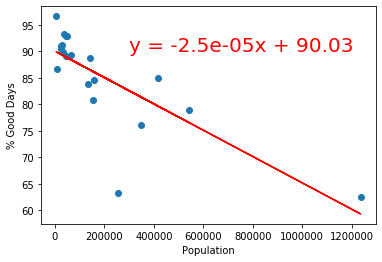

R squared: 0.6004172915808645


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Population,state,County Code,State Name,Air Quality
0,Minnesota,Anoka,2018,365,278,86,1,0,0,0,...,6,216,0,142,1,347431.0,27,003,Minnesota,76.164384
1,Minnesota,Becker,2018,358,322,36,0,0,0,0,...,0,203,0,155,0,33773.0,27,005,Minnesota,89.944134
2,Minnesota,Beltrami,2018,352,327,24,1,0,0,0,...,0,0,0,352,0,46117.0,27,007,Minnesota,92.897727
3,Minnesota,Carlton,2018,354,330,24,0,0,0,0,...,0,159,0,195,0,35540.0,27,017,Minnesota,93.220339
4,Minnesota,Cass,2018,320,292,28,0,0,0,0,...,0,0,0,320,0,29022.0,27,021,Minnesota,91.250000
5,Minnesota,Cook,2018,353,341,12,0,0,0,0,...,0,0,0,353,0,5311.0,27,031,Minnesota,96.600567
6,Minnesota,Crow Wing,2018,348,311,36,1,0,0,0,...,0,167,0,181,0,63855.0,27,035,Minnesota,89.367816
7,Minnesota,Dakota,2018,365,310,55,0,0,0,0,...,64,0,0,301,0,418201.0,27,037,Minnesota,84.931507
8,Minnesota,Goodhue,2018,231,206,24,1,0,0,0,...,0,231,0,0,0,46217.0,27,049,Minnesota,89.177489
9,Minnesota,Hennepin,2018,365,228,136,1,0,0,0,...,12,60,0,159,130,1235478.0,27,053,Minnesota,62.465753


In [11]:
population_2018 = df3.iloc[:, 19]
air_2018 = df3.iloc[:, 4]
aqi_days_2018 = df3.iloc[:, 3]
df3["Air Quality"] = (air_2018 / aqi_days_2018)*100

air_quality_2018 = df3.iloc[:, 23]
eight_slope, eight_int, eight_r, eight_p, eight_std_err = stats.linregress(population_2018, air_quality_2018)
eight_fit = eight_slope * population_2018 + eight_int
line_3 = "y = " + str(round(eight_slope, 6)) + "x + " + str(round(eight_int, 2))
plt.scatter(population_2018, air_quality_2018)
plt.plot(population_2018, eight_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_3, (300000, 90), fontsize=20, color = "red")
plt.show()
print(f"R squared: {eight_r ** 2}")
df3.head(25)